In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torchvision
import os


transform = transforms.Compose([#transforms.Resize((256,256)),  
                                transforms.Grayscale(),		# the code transforms.Graysclae() is for changing the size [3,100,100] to [1, 100, 100] (notice : [channel, height, width] )
                                transforms.ToTensor(),])


#train_data_path = 'relative path of training data set'
train_data_path = 'horse-or-human/horse-or-human/train'
trainset = torchvision.datasets.ImageFolder(root=train_data_path, transform=transform)
# change the valuse of batch_size, num_workers for your program
# if shuffle=True, the data reshuffled at every epoch #numworks가 뭐지?
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1027, shuffle=False, num_workers=0)  


validation_data_path = 'horse-or-human/horse-or-human/validation'
valset = torchvision.datasets.ImageFolder(root=validation_data_path, transform=transform)
# change the valuse of batch_size, num_workers for your program
valloader = torch.utils.data.DataLoader(valset, batch_size=256, shuffle=False, num_workers=0)  

NUM_EPOCH=1
for epoch in range(NUM_EPOCH):
    # load training images of the batch size for every iteration
    for i, data in enumerate(trainloader):

        # inputs is the image
        # labels is the class of the image
        inputs, labels = data

        # if you don't change the image size, it will be [batch_size, 1, 100, 100]
        #print(inputs.shape)

        # if labels is horse it returns tensor[0,0,0] else it returns tensor[1,1,1]
        #print(labels)  





    # load validation images of the batch size for every iteration
    for i, data in enumerate(valloader):
        
        # inputs is the image
        # labels is the class of the image
        inputs, labels = data

        # if you don't change the image size, it will be [batch_size, 1, 100, 100]
        #print(inputs.shape)

        # if labels is horse it returns tensor[0,0,0] else it returns tensor[1,1,1]
        #print(labels)    

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import torch.nn as nn
import numpy as np
import plotly.graph_objects as go

In [3]:
train_dataset = next(iter(trainloader))[0].numpy()
train_label =next(iter(trainloader))[1].numpy()

val_dataset = next(iter(valloader))[0].numpy()
val_label =next(iter(valloader))[1].numpy()

In [4]:
train_label=train_label.reshape(1027,1)
val_label=val_label.reshape(256,1)

In [5]:
train_flatten=train_dataset.reshape(1027,train_dataset.shape[2]*train_dataset.shape[3])
val_flatten=val_dataset.reshape(256,val_dataset.shape[2]*val_dataset.shape[3])

In [6]:
x_train=train_flatten.T
y_train=train_label.T

x_test=val_flatten.T
y_test=val_label.T

In [7]:
n_x = x_train.shape[0] # size of input layer`
#n_h=10 # size of hidden layer
n_y = y_train.shape[0] # size of output layer
m = x_train.shape[1]
a =0.1

In [8]:
n_h = 200# hidden layer size
#learning_rate=0.01

W1 = np.random.randn(n_h,n_x) * 0.01
b1 = np.zeros(shape=(n_h, 1))

W2 = np.random.randn(n_h,n_h) * 0.01
b2 = np.zeros(shape=(n_h, 1))

W3 = np.random.randn(n_y,n_h) * 0.01
b3 = np.zeros(shape=(n_y, 1))

In [9]:
#initiate variables
def init_var() : 
    global W1,b1,W2,b2,W3,b3
    W1 = np.random.randn(n_h,n_x) * 0.01
    b1 = np.zeros(shape=(n_h, 1))

    W2 = np.random.randn(n_h,n_h) * 0.01
    b2 = np.zeros(shape=(n_h, 1))

    W3 = np.random.randn(n_y,n_h) * 0.01
    b3 = np.zeros(shape=(n_y, 1))
    

In [10]:
def sigmoid(z):
    y = 1/(1+np.exp(-z))
    return y

In [11]:
def forward_p(x_train):
    #print(parameters)
    Z1 = np.dot(W1,x_train) + b1
    A1 = leakyrelu(Z1) # activation function
    
    Z2 = np.dot(W2,A1) + b2
    A2 = leakyrelu(Z2)  
    
    Z3 = np.dot(W3,A2) + b3
    A3 = sigmoid(Z3) # Final output prediction
    return A3, A2 , A1, Z2, Z1

In [12]:
# Compute the cross-entropy cost
def compute_cost(A3, Y):
    loss = np.multiply(np.log(A3), Y) + np.multiply((1 - Y), np.log(1 - A3))
    cost = - np.sum(loss) / m
    return cost

In [13]:
def leakyrelu(z):
    return np.where(z > 0, z, z * a)

In [14]:
def der_leakyrelu(z):
    return np.where(z <= 0, 0, a)

In [15]:
def back_p( X, Y, A3, A2, A1, Z2 ,Z1) :
    dZ3 = A3 - Y
    dW3 = (1 / m) * np.dot(dZ3, A2.T)
    db3 = (1 / m) * np.sum(dZ3, axis=1, keepdims=True)
    
    dZ2 = np.multiply(np.dot(W3.T, dZ3), der_leakyrelu(Z2))
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    
    dZ1 = np.multiply(np.dot(W2.T, dZ2), der_leakyrelu(Z1))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {'dW3':dW3, 'db3':db3, 'dW2':dW2,'db2':db2,'dW1':dW1,'db1':db1}    
    return grads
    #return {'dW1':dW1, 'db1':db1, 'dW2':dW2, 'db2':db2, 'dW3':dW3,'db3':db3}
    #return dW1,db1,dW2,db2,dW3,db3

In [16]:
def update_parameters(  dW1=0,db1=0,dW2=0,db2=0,dW3=0,db3=0) :
    global W1,b1,W2,b2,W3,b3
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W3 = W3 - learning_rate * dW3
    b3 = b3 - learning_rate * db3

In [18]:
def predict(X,A3) :
    #A3,_,__ = forward_p(X)
    predictions = A3 >0.5
    predictions = np.where(A3 > 0.5, 1, 0)
    return predictions

def print_accuracy(X, Y, A3, train) :
    predictions = predict(X, A3)
    #if train ==1 :
        #print("\tTraining Accuracy: %.10f" %(100 - np.mean(np.abs(predictions - Y)) * 100)+'%',end='')
    #else :
        #print("\tValidation Accuracy: %.10f" %(100 - np.mean(np.abs(predictions - Y)) * 100)+'%')
    
    return (100 - np.mean(np.abs(predictions - Y)) * 100)
    #print('Accuracy: %f' %(float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T)))/float(Y.size)*100)+ '%')

In [19]:
l_index = []
l_train_cost_list = []
l_val_cost_list = []
l_ac_train=[]
l_ac_val= []

In [20]:
highest=0
highestindex=0
highestloss=0

In [21]:
def nn_leakyrelu(X, Y, n_h, num_iterations , X_test, Y_test) :
    global highest, highesindex, learning_rate, highestloss
    init_var()
    for i in range(0, num_iterations) :
        A3 ,A2, A1, Z2, Z1= forward_p(X)
        cost = compute_cost(A3, Y)
        grads = back_p(X, Y, A3, A2, A1, Z2, Z1)
        parameters = update_parameters( **grads)
        
        
        
        if i % 1 == 0:
            val_A3,_,__,_____,___=forward_p(X_test)
            val_cost=compute_cost(val_A3,Y_test)
            #print("#%i Training loss : %.10f\tValidation loss : %.10f" %(i,cost,val_cost),end='')
            l_train_ac = print_accuracy(X,Y,A3,1)
            l_val_ac = print_accuracy(X_test,Y_test,val_A3,0)
            
            l_index.append(i)
            l_train_cost_list.append(cost)
            l_val_cost_list.append(val_cost)
            l_ac_train.append(l_train_ac)
            l_ac_val.append(l_val_ac)
                
        if i > 300 :
            if l_train_cost_list[-1] == l_train_cost_list[-2] : 
                break
                
        #if cost< 0.09:
        #    learning_rate=0.1
        #if cost<0.05:
        #    learning_rate=0.05
        #if cost<0.01:
        #    learning_rate=0.01
        if highest < l_val_ac :
            highest = l_val_ac
            highestindex=i
            highestloss=val_cost
            
    return l_index,l_train_cost_list,l_val_cost_list,l_ac_train,l_ac_val

In [22]:
#leakyrelu
learning_rate=0.5
l_index,l_train_cost_list,l_val_cost_list,l_ac_train,l_ac_val = nn_leakyrelu(x_train, y_train ,n_h, 3000 , x_test,y_test)

leakyrelu


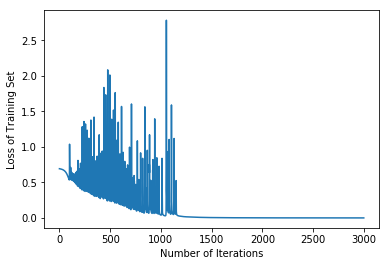

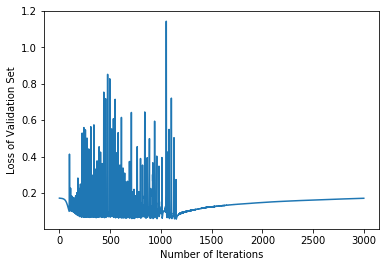

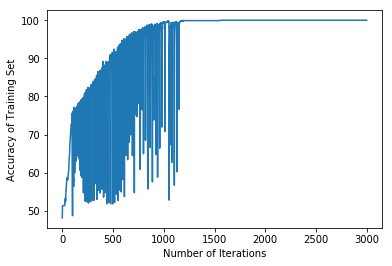

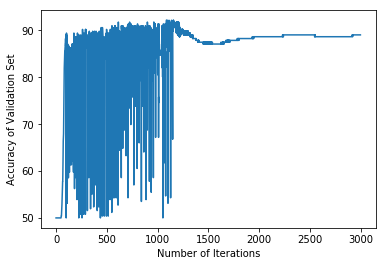

In [23]:
    print("leakyrelu")
    plt.plot(l_index,l_train_cost_list)
    #plt.xticks(l_index,rotation='vertical')
    plt.xlabel("Number of Iterations")
    plt.ylabel("Loss of Training Set")
    plt.show()
    
    plt.plot(l_index,l_val_cost_list)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Loss of Validation Set")
    plt.show()
                          
    plt.plot(l_index,l_ac_train)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Accuracy of Training Set")
    plt.show()
                            
    plt.plot(l_index,l_ac_val)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Accuracy of Validation Set")
    plt.show()

In [25]:
headerColor = 'grey'
rowEvenColor = 'lightgrey'
rowOddColor = 'white'

fig = go.Figure(data=[go.Table(
header=dict(
values=['<b></b>','<b>training</b>','<b>validation</b>','<b>best of validation</b>'],
line_color='darkslategray',
fill_color=headerColor,
align=['left','center'],
font=dict(color='white', size=12)),
cells=dict(
values=[
    ['loss', 'accuracy'],
    ["{0:.10f}".format(l_train_cost_list[-1]), "{0:.10f}".format(l_ac_train[-1])],
    ["{0:.10f}".format(l_val_cost_list[-1]), "{0:.10f}".format(l_ac_val[-1])],
    ["{0:.10f}".format(highestloss),"{0:.10f}".format(highest)]],
    line_color='darkslategray',
    # 2-D list of colors for alternating rows
#align = ['left', 'center'],
font = dict(color = 'darkslategray', size = 11)))])

fig.show()